In [ ]:
import librosa as lb
import librosa.display
import matplotlib.pyplot as plt
import os
import re
import pandas as pd
import numpy as np
import IPython.display as ipd
import soundfile as sf
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
usr_folder = r'/content/drive/MyDrive/Big Data/Datamining/Practica/2025_Datasets_Datamining' # Albert


In [ ]:
usr_folder = r'/content/drive/MyDrive/Master/Data Mining/Prácticas Data Mining/2025_Datasets_Datamining' # Wenjie

In [ ]:
output_folder = usr_folder +  '/dataset_lite/Output'

In [ ]:
df = pd.read_csv(output_folder + "/features_solas.csv")
df.head()
df.tail()

,ship,date,audio_path,zcr_1,zcr_2,zcr_3,zcr_4,zcr_5,zcr_6,zcr_7,...,delta2_mfcc_13_164,delta2_mfcc_13_165,delta2_mfcc_13_166,delta2_mfcc_13_167,delta2_mfcc_13_168,delta2_mfcc_13_169,delta2_mfcc_13_170,delta2_mfcc_13_171,delta2_mfcc_13_172,delta2_mfcc_13_173
2812,Cargo,20171215,/content/drive/MyDrive/Big Data/Datamining/Pra...,0.025391,0.035156,0.047852,0.051758,0.043457,0.051270,0.048828,...,0.848431,0.460462,0.206108,0.111823,-0.083997,-0.110537,-0.066474,-0.000142,-0.069333,-0.225826
2813,Cargo,20171215,/content/drive/MyDrive/Big Data/Datamining/Pra...,0.020508,0.033691,0.039062,0.031738,0.034180,0.034180,0.036133,...,-0.575876,-0.761920,-0.619396,-0.042054,0.191413,0.123859,-0.022374,0.023498,-0.031606,-0.043965
2814,Cargo,20171215,/content/drive/MyDrive/Big Data/Datamining/Pra...,0.011230,0.033691,0.052246,0.061035,0.063477,0.050781,0.038086,...,0.026764,-0.740635,-0.895193,-0.223999,0.363778,0.528912,0.247174,-0.085360,-0.148452,-0.327690
2815,Cargo,20171215,/content/drive/MyDrive/Big Data/Datamining/Pra...,0.024414,0.036621,0.058594,0.054688,0.044922,0.034668,0.015625,...,0.132078,-0.014066,-0.301698,0.204140,0.610491,0.426699,0.303088,-0.072504,-0.470858,-0.541813
2816,Cargo,20171215,/content/drive/MyDrive/Big Data/Datamining/Pra...,0.009277,0.022461,0.032227,0.034180,0.044922,0.041992,0.036621,...,0.115618,0.214094,0.182937,0.170767,0.157205,0.190524,-0.199536,0.092588,0.194965,0.074405


<Axes: xlabel='ship', ylabel='count'>

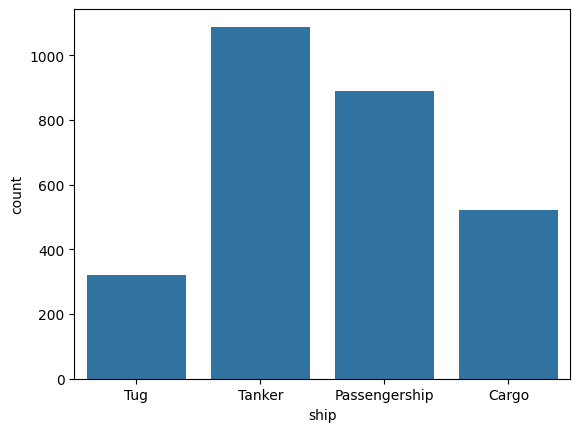

In [ ]:
sns.countplot(x=df["ship"])

Se ve claramente que hay un problema de desbalanceo de targets.

# Upsampling

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()
X = df.drop(["ship", "date", "audio_path"], axis = 1)
y = df["ship"]
X_res, y_res = smote.fit_resample(X, y)
print(y_res)

0       Tug
1       Tug
2       Tug
3       Tug
4       Tug
       ... 
4347    Tug
4348    Tug
4349    Tug
4350    Tug
4351    Tug
Name: ship, Length: 4352, dtype: object


<Axes: xlabel='ship', ylabel='count'>

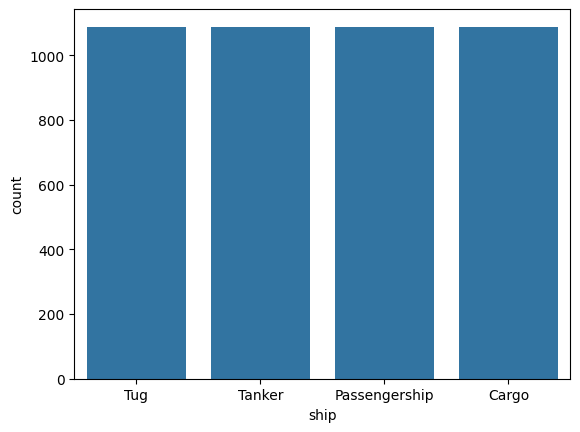

In [ ]:
sns.countplot(x=y_res)

In [ ]:
y_res.value_counts()

,count
ship,
Tug,1088
Tanker,1088
Passengership,1088
Cargo,1088


# Save dataset

In [ ]:
df_to_save = pd.concat([X_res, y_res], axis = 1)
df_to_save.head()

,zcr_1,zcr_2,zcr_3,zcr_4,zcr_5,zcr_6,zcr_7,zcr_8,zcr_9,zcr_10,...,delta2_mfcc_13_165,delta2_mfcc_13_166,delta2_mfcc_13_167,delta2_mfcc_13_168,delta2_mfcc_13_169,delta2_mfcc_13_170,delta2_mfcc_13_171,delta2_mfcc_13_172,delta2_mfcc_13_173,ship
0,0.058594,0.091309,0.129883,0.132324,0.148438,0.155273,0.163574,0.174805,0.165039,0.172852,...,0.353471,-0.539326,-0.593846,-0.087600,0.090272,0.222070,0.397106,0.185581,-0.135302,Tug
1,0.074707,0.115723,0.148438,0.145508,0.143555,0.151855,0.146973,0.153809,0.152832,0.140137,...,0.288689,0.183651,-0.083120,-0.491810,-0.516019,-0.168281,0.133987,0.274122,0.309610,Tug
2,0.028320,0.061523,0.097656,0.137695,0.157227,0.158203,0.159180,0.148438,0.147949,0.152832,...,-0.023939,-0.064059,-0.061440,-0.229533,-0.193364,-0.033704,0.162507,0.078551,0.139886,Tug
3,0.045898,0.067383,0.099609,0.112305,0.118164,0.134766,0.135742,0.137207,0.146973,0.155762,...,-0.107998,0.265693,0.431460,0.372566,0.176892,0.045814,-0.302587,-0.240113,-0.239989,Tug
4,0.065918,0.106934,0.141602,0.152344,0.160156,0.167480,0.172852,0.164062,0.157227,0.144531,...,0.319330,-0.126260,-0.694741,-0.685308,-0.153801,0.155806,0.382153,0.465791,0.115878,Tug


In [ ]:
df_to_save.to_csv(output_folder + '/features_upsampling.csv', index=False)